In [14]:
# install Pint if necessary

try:
    import pint
except ImportError:
    !pip install pint

In [15]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ModSimPy/raw/master/modsim.py')

# Definitions

Definir un etat qui represente les velos dans chaque point.

Nous commençons avec 10 velos a Mailly et 2 velos a Moulin.

On va definir aussi des fontions qui nous permettront de bouger une velo d'un point vers l'autre.

In [16]:
from modsim import *

bikeshare = State(mailly=10, moulin=2)

def velo_a_mailly():
    print('Moving a bike to moulin')
    bikeshare.mailly -= 1
    bikeshare.moulin += 1

def velo_a_moulin():
    print('Moving a bike to mailly')
    bikeshare.moulin -= 1
    bikeshare.mailly += 1


# Simuler chaque minute

Step simule la probabilité qu'un velo a été amené vers l'autre point.

In [17]:

def step(p1, p2):
    if flip(p1):
        velo_a_mailly()
    
    if flip(p2):
        velo_a_moulin()

# Résultats

Accumuler les nombre des velos dans un point pour visualisation.

In [18]:
results = TimeSeries()

for i in range(10):
    print(f"step {i}")
    step(0.5, 0.33)
    results[i+1] = bikeshare.mailly


step 0
Moving a bike to moulin
step 1
Moving a bike to mailly
step 2
step 3
step 4
step 5
Moving a bike to moulin
step 6
Moving a bike to moulin
Moving a bike to mailly
step 7
Moving a bike to moulin
Moving a bike to mailly
step 8
step 9


In [19]:

show(results)


,Quantity
Time,
1,9
2,10
3,10
4,10
5,10
6,9
7,9
8,9
9,9


<Axes: xlabel='Time'>

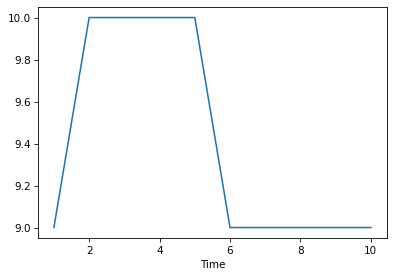

In [20]:
results.plot()